In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/train.csv')
df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


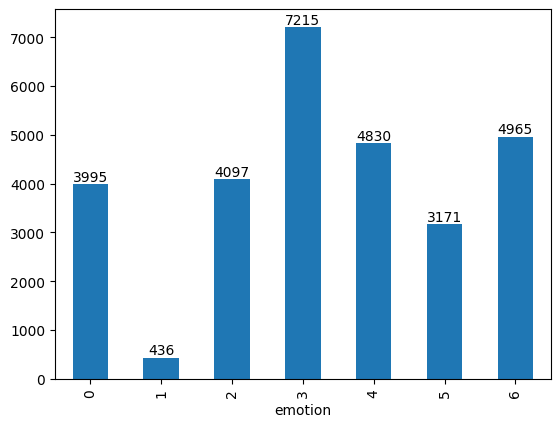

: 

In [11]:
import matplotlib.pyplot as plt

# plot the class distribution and sort it by the index and display the count of each class
ax = df['emotion'].value_counts().sort_index().plot(kind='bar')

# add the value of each bar above the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# display the plot
plt.show()

In [7]:
class_counts = np.array([3995, 436, 4097, 7215, 4830, 3171, 4965])  # Ordered by indices: 0, 1, 2, 3, 4, 5, 6
total_samples = class_counts.sum()
inverse_frequency = total_samples / class_counts
normalized_alpha = inverse_frequency / inverse_frequency.max()

print("Alpha values per class:", normalized_alpha)

Alpha values per class: [0.11904762 1.         0.15625    0.07142857 0.1        1.
 0.1       ]


In [7]:
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [11]:
#load the test data
df_test = pd.read_csv('../data/test_with_emotions.csv')

#remove the first column
df_test = df_test.drop(df_test.columns[0], axis=1)

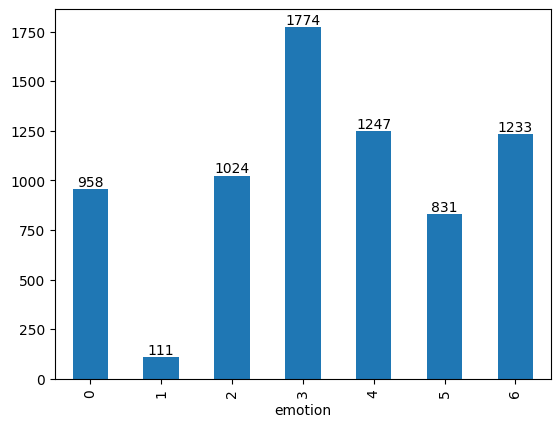

In [8]:
# plot the class distribution and sort it by the index and display the count of each class converted to the emotion name
ax = df_test['emotion'].value_counts().sort_index().plot(kind='bar')

# add the value of each bar above the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

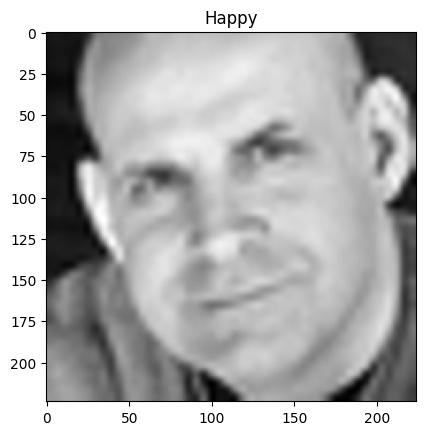

: 

In [85]:
#display images of each class
import cv2
import random
from PIL import Image


#random number
rand = random.randint(0, len(df_test))


pixels = df_test['pixels'][rand]

pixel_values = list(map(int, pixels.split()))
# Convert the list to a numpy array and reshape it to 48x48
image_array = np.array(pixel_values).reshape(48, 48)

# Resize the image from 48x48 to 224x224
image = Image.fromarray(image_array)

# Resize the image to 224x224
resized_image = image.resize((224, 224))

# Convert the resized image back to a numpy array for plotting
resized_image_array = np.array(resized_image)

# Display the image with the emotion label
plt.imshow(resized_image_array, cmap='gray')
plt.title(emotion_classes[df_test['emotion'][rand]])
#plt.axis('off')
plt.show()